In [127]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Loading the data
M = loadmat('/content/MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

#just to make all random sequences on all computers the same.
np.random.seed(1)

#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

In [128]:
# One Hot encoding
def one_hot_encode(input_labels):
  array_encode = np.zeros((len(input_labels),10), dtype=np.float32)
  for i in range(len(input_labels)):
    array_encode[i][int(input_labels[i][0])] = 1.0 
  return array_encode

# Initializing the weight
def initialize(input_layer_count,output_layer_count):
    random_weights = np.random.rand(output_layer_count,input_layer_count)*0.001
    # Converting weight to float data type
    weights= random_weights.astype(np.float32)
    return weights

In [129]:
# ReLU function
def relu_func(x):
  return np.maximum(0.0,x)

# Derivative of ReLU
def relu_deriv(x):
  return np.array(x > 0, dtype = np.float32)

# Softmax function
def softmax_func(x):
  return np.exp(x)/ (np.sum(np.exp(x),axis=0))

In [130]:
# Moving in forward direction of network
def forward_proceed(input_neurons,weight1):
  activation1_output = weight1.dot(input_neurons)
  softmax_output = softmax_func(activation1_output)
  return activation1_output,softmax_output

# Calculating cross entropy loss
def loss_func(one_hot_value,softmax_output):
  loss = -(np.sum(one_hot_value*np.log(softmax_output)))
  return loss

In [131]:
# Moving in backward direction of network from output to input
def back_propagate(deriv_w_t_z,input):
  dwt1 = deriv_w_t_z.dot(input.T)
  return dwt1

In [132]:
# Updating weight
def update_wt(wt1, dwt1, learning_rate):
    wt1 = wt1 - learning_rate * dwt1   
    return wt1

In [133]:
# Predicted value by model
def predicted_values(softmax_output):
  return np.argmax(softmax_output, axis=0)

# Calculating accuracy of model
def calc_accuracy(predictions, labels_train):
  return (np.sum(predictions == labels_train) / labels_train.size)*100

In [134]:
# Training network using Stochastic Gradient Descent
def train_network(images_train,labels_train,labels_train_encode,batch_size,learning_rate,epochs,step_size):
  # Initial random weight and bias
  weight1 = initialize(784,10)
  # List to store weight after each epoch
  epoch_weight = []

  # Number of iterations 
  for each_epoch in range(epochs):
    # List to store weight after each step size in an interation
    weight_of_ranges = []

    # Calculating each batch size
    each_batch_size=len(images_train[1])//batch_size

    # Running loop for each batch size
    for each_batch in range(each_batch_size):
      # Batch start and end positions
      batch_start = each_batch*batch_size
      batch_end = (each_batch+1)*batch_size

      images_train_check = images_train[:,batch_start:batch_end]
      labels_train_check = labels_train[:,batch_start:batch_end]
      labels_train_encode_check = labels_train_encode[:,batch_start:batch_end]

      # Forward feeding the network
      activation1,softmax = forward_proceed(images_train_check,weight1)

      # Calculating deriative for backward propagation
      derivative=softmax-labels_train_encode_check

      # Back propagation in the network
      dwt1=back_propagate(derivative,images_train_check)

      # Updating the weight in the network
      weight1=update_wt(weight1,dwt1,learning_rate)

      # Appending value at each step_size
      if each_batch % step_size == 0:
        weight_of_ranges.append(weight1)

    # Appending value after each epoch
    epoch_weight.append(weight1)

  return weight_of_ranges,epoch_weight

In [135]:
# Training the model
# Input data to be taken
images_train_try = images_train[0:60000].T
labels_train_try = labels_train[0:60000].T
# One hot encoding the labels
labels_train_encode_try = one_hot_encode(labels_train[0:60000]).T
epochs = 1
batch_size = 10
learning_rate = 0.01
step_size = 100

weight_range,iteration_weight = train_network(images_train_try,labels_train_try,labels_train_encode_try,batch_size,
                                              learning_rate,epochs,step_size)


In [136]:
# Testing to be done
images_test_try = images_test[:10000].T
labels_test_try = labels_test[:10000].T
# One hot encoding the labels
labels_test_encode_try = one_hot_encode(labels_test[0:10000]).T
softmax_values=[]

def test_output(images_test_try,labels_test_try,labels_test_encode_try,weight):
  act,soft=forward_proceed(images_test_try,weight)
  softmax_values.append(np.max(soft,axis=0))
  prediction_value = predicted_values(soft)
  ground_truth = labels_test_try
  test_accuracy=calc_accuracy(prediction_value,ground_truth)
  softmax=softmax_values[0]
  return prediction_value,ground_truth,test_accuracy,softmax

prediction_value,ground_truth,test_accuracy,softmax = test_output(images_test_try,labels_test_try,labels_test_encode_try,
                                                                  weight_range[-1])


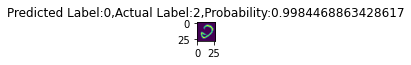

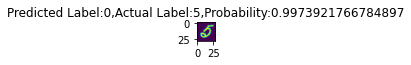

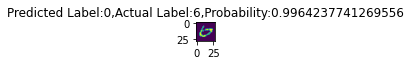

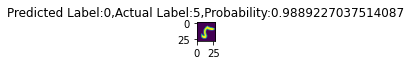

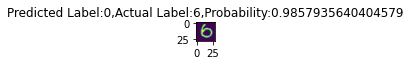

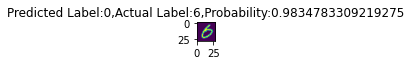

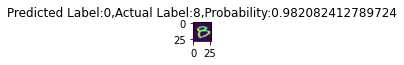

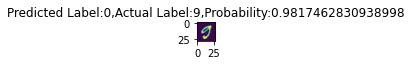

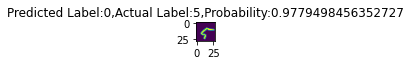

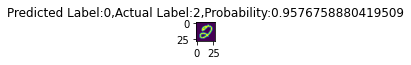

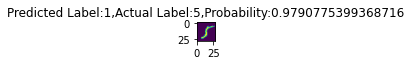

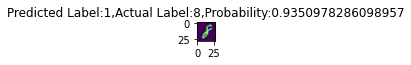

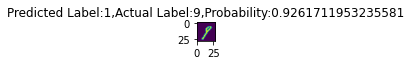

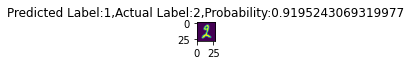

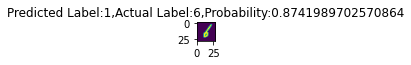

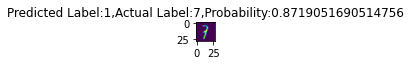

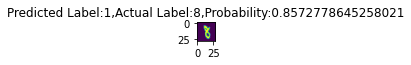

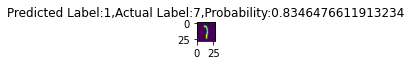

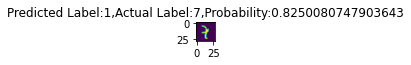

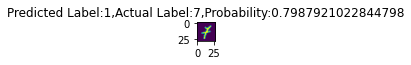

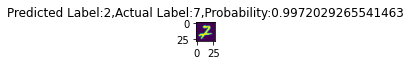

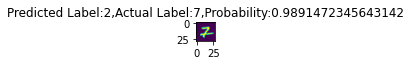

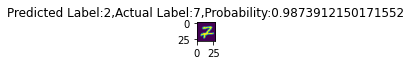

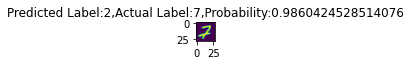

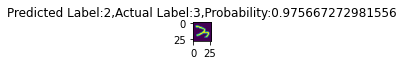

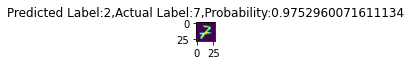

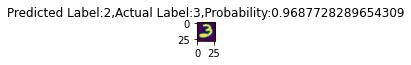

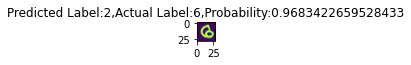

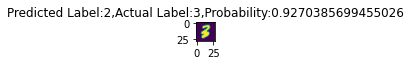

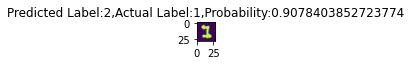

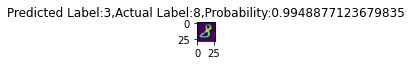

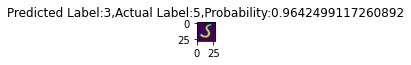

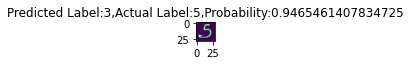

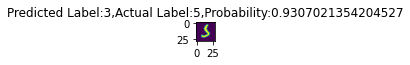

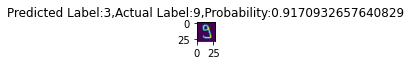

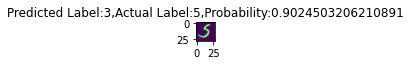

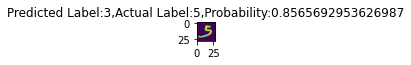

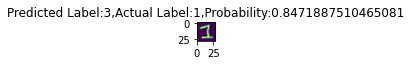

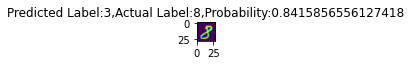

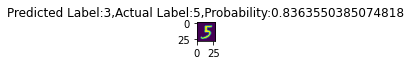

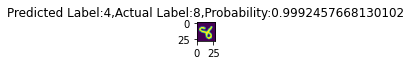

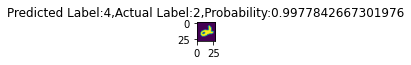

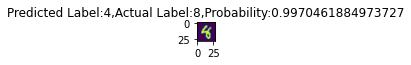

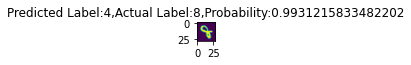

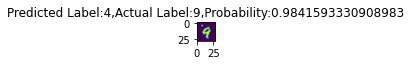

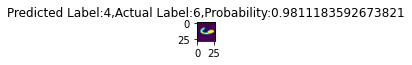

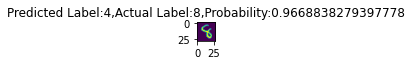

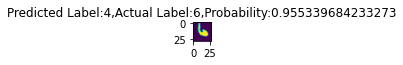

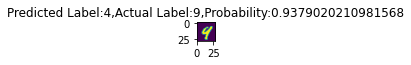

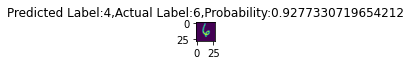

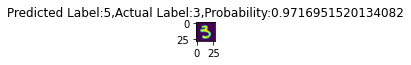

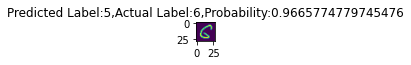

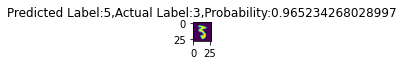

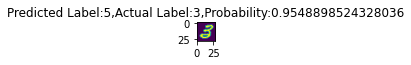

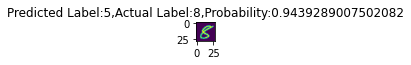

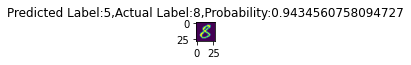

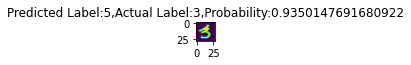

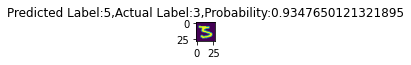

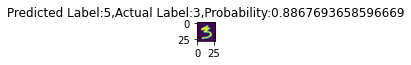

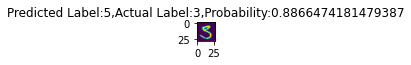

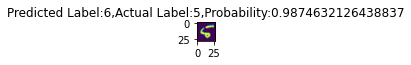

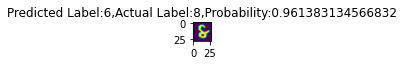

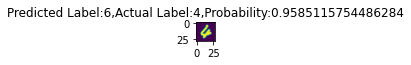

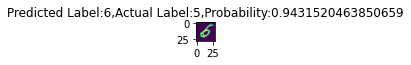

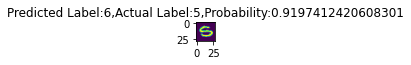

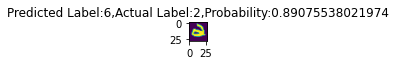

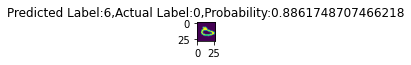

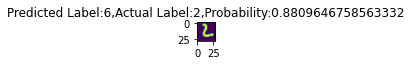

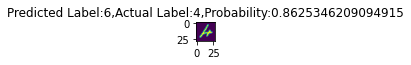

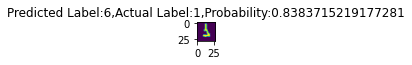

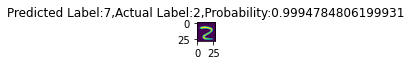

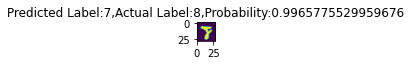

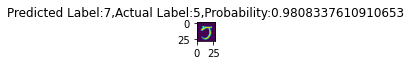

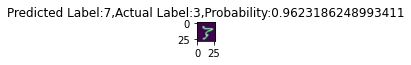

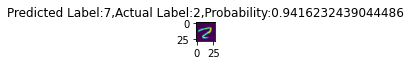

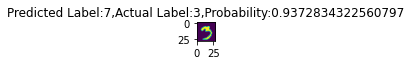

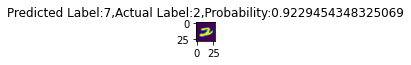

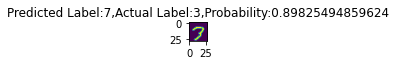

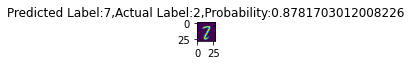

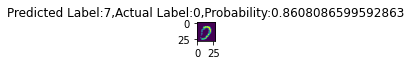

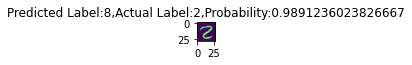

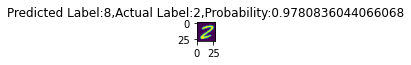

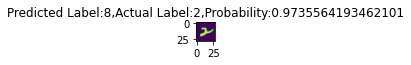

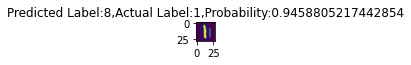

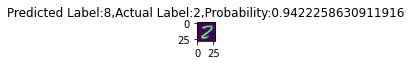

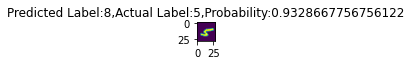

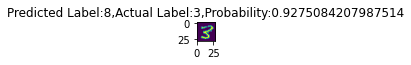

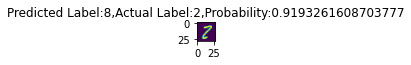

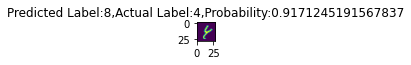

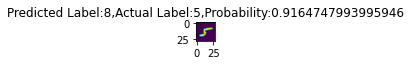

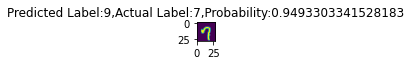

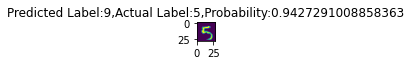

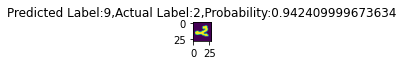

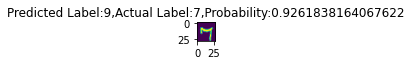

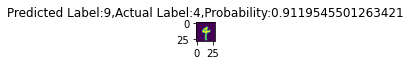

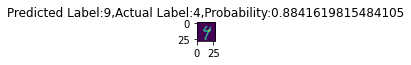

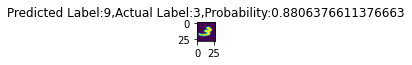

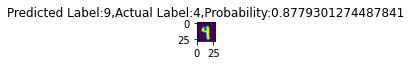

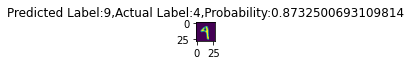

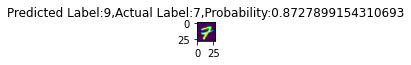

In [137]:
# Answer for 2 
# Finding the misclassified images along with their probabilities in test data
misclassify ={}
def misclassified_images(ground_truth,prediction_value,softmax):
  for i in range(len(prediction_value)):
    if prediction_value[i]!=ground_truth[i]:
      if prediction_value[i] not in misclassify:
        misclassify[prediction_value[i]]= [(softmax[i],ground_truth[i],i)]
      else:
        misclassify[prediction_value[i]].append((softmax[i],ground_truth[i],i))
  return misclassify

misclassify_array=misclassified_images(ground_truth[0],prediction_value,softmax)

# Displaying wrong_prediction , their probability and index
top_ten_wrong = []
for each_digit in range(10):
  each_digit_dict = misclassify[each_digit]
  top_ten_each = sorted(each_digit_dict,reverse=True)[:10]
  top_ten_wrong.append(top_ten_each)

# Plotting 10 misclassified images per label
for j in range(10):
  lable_digit=top_ten_wrong[j]
  for i in range(10):
    index = lable_digit[i][2]
    predicted_value = lable_digit[i][1]
    softmax_value = lable_digit[i][0]
    im = images_test[index,:].reshape((28,28),order='F')
    plt.subplot(10,10,i+1)
    plt.imshow(im)
    plt.title('Predicted Label:{},Actual Label:{},Probability:{}'.format(j,predicted_value,softmax_value))
    plt.show()


In [138]:
one_epoch_accuracy_array = []
for i in range(len(weight_range)):
  prediction_value,ground_truth,test_accuracy,softmax=test_output(images_test_try,labels_test_try,labels_test_encode_try,
                                                                  weight_range[i])
  one_epoch_accuracy_array.append(test_accuracy)


Accuracy obtained is:  [29.38, 85.59, 85.66, 88.07000000000001, 88.47, 88.71, 89.14999999999999, 89.36, 87.19, 89.63, 89.37, 89.98, 89.37, 90.03999999999999, 89.86, 89.0, 90.12, 89.91, 90.93, 90.78, 89.72, 90.49000000000001, 91.10000000000001, 90.51, 90.63, 91.10000000000001, 91.14999999999999, 90.89, 90.72, 90.7, 91.17, 91.18, 91.21000000000001, 90.44, 91.13, 90.97, 91.14999999999999, 91.25999999999999, 91.07, 90.96, 90.0, 91.23, 90.99000000000001, 90.22, 91.42, 91.35, 90.73, 91.06, 91.21000000000001, 91.19, 91.67, 91.35, 91.29, 91.41, 91.52, 91.03, 90.62, 91.29, 91.35, 91.4]


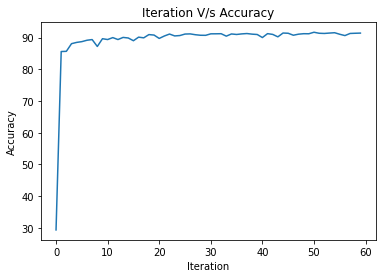

In [139]:
# Answer for 1 
print("Accuracy obtained is: ",one_epoch_accuracy_array)
x = [i for i in range(len(weight_range))]
y = one_epoch_accuracy_array 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('Iteration') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Iteration V/s Accuracy')     
# function to show the plot 
plt.show()

Accuracy for batch size 100 is:  [90.58, 91.07, 91.25999999999999, 91.36999999999999, 91.41, 91.44, 91.45, 91.42, 91.43, 91.36, 91.33, 91.29, 91.32000000000001, 91.33, 91.28, 91.27, 91.3, 91.33, 91.35, 91.33]


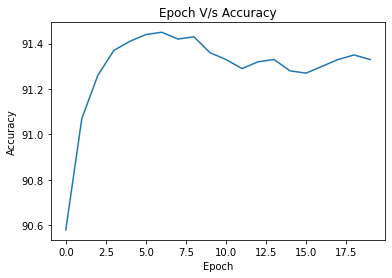

In [140]:
# Batch size:100

# Testing to be done
images_test_try = images_test[:10000].T
labels_test_try = labels_test[:10000].T
# One hot encoding the labels
labels_test_encode_try = one_hot_encode(labels_test[0:10000]).T
softmax_values=[]

batch_size = 100
epochs = 20
step_size = 100

weight_range,iteration_weight = train_network(images_train_try,labels_train_try,labels_train_encode_try,batch_size,learning_rate,
                                      epochs,step_size)

iteration_accuracy_array = []
for i in range(epochs):
  prediction_value,ground_truth,it_test_accuracy,softmax=test_output(images_test_try,labels_test_try,labels_test_encode_try,
                                                                  iteration_weight[i])
  iteration_accuracy_array.append(it_test_accuracy)
print("Accuracy for batch size 100 is: ",iteration_accuracy_array)

x = [i for i in range(epochs)]
y = iteration_accuracy_array 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('Epoch') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Epoch V/s Accuracy')     
# function to show the plot 
plt.show()

Accuracy for batch size 10 is:  [91.17, 91.44, 91.52, 91.55, 91.57, 91.53, 91.59, 91.63, 91.63, 91.64999999999999, 91.74, 91.79, 91.78, 91.78, 91.78, 91.8, 91.79, 91.81, 91.81, 91.77]


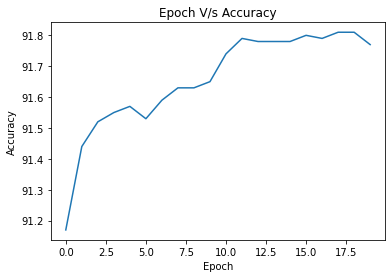

In [141]:
# Batch size:10

batch_size = 10
epochs = 20
step_size = 100
weight_range,iteration_weight = train_network(images_train_try,labels_train_try,labels_train_encode_try,batch_size,learning_rate,
                                      epochs,step_size)

iteration_accuracy_array = []
for i in range(epochs):
  prediction_value,ground_truth,it_test_accuracy,softmax=test_output(images_test_try,labels_test_try,labels_test_encode_try,
                                                                  iteration_weight[i])
  iteration_accuracy_array.append(it_test_accuracy)
print("Accuracy for batch size 10 is: ",iteration_accuracy_array)

x = [i for i in range(epochs)]
y = iteration_accuracy_array 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('Epoch') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Epoch V/s Accuracy')     
# function to show the plot 
plt.show()

Accuracy for batch size 1 is:  [91.2, 91.44, 91.5, 91.53999999999999, 91.47999999999999, 91.51, 91.57, 91.58, 91.63, 91.67, 91.67, 91.66, 91.67, 91.71000000000001, 91.74, 91.73, 91.75, 91.75, 91.77, 91.77]


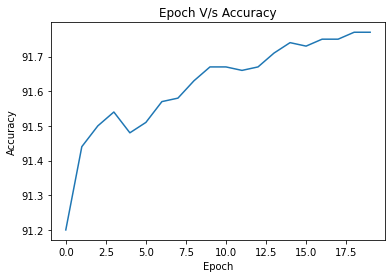

In [142]:
# Batch size:1

batch_size = 1
epochs = 20
step_size = 100
weight_range,iteration_weight = train_network(images_train_try,labels_train_try,labels_train_encode_try,batch_size,learning_rate,
                                      epochs,step_size)

iteration_accuracy_array = []
for i in range(epochs):
  prediction_value,ground_truth,it_test_accuracy,softmax=test_output(images_test_try,labels_test_try,labels_test_encode_try,
                                                                  iteration_weight[i])
  iteration_accuracy_array.append(it_test_accuracy)
print("Accuracy for batch size 1 is: ",iteration_accuracy_array)

x = [i for i in range(epochs)]
y = iteration_accuracy_array 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('Epoch') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Epoch V/s Accuracy')     
# function to show the plot 
plt.show()


Accuracy obtained is:  [31.89, 41.93, 48.67, 52.05, 54.03, 55.1, 55.74, 56.15, 56.379999999999995, 56.55]


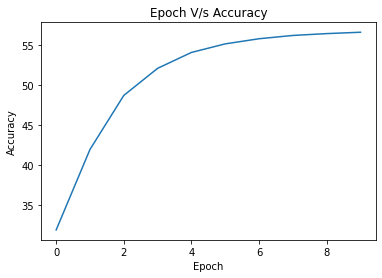

In [145]:
# Input data to be taken
images_train_try = images_train[0:100].T[0]
labels_train_try = labels_train[0:100].T[0]

# Finding single image for each digit
seen_digit=[]
digits_index=[]
for i in range(len(labels_train_try)):
  if labels_train_try[i] not in seen_digit:
    seen_digit.append(labels_train_try[i])
    digits_index.append(i)
  if len(seen_digit)==10:
    break

images_train_single_digit = images_train[(digits_index)].T
labels_train_single_digit = labels_train[(digits_index)].T

# One hot encoding the labels
labels_train_encode_single_digit = one_hot_encode(labels_train[(digits_index)]).T
epochs = 10
batch_size = 10
learning_rate = 0.01
step_size=1

weight_range,iteration_wt = train_network(images_train_single_digit,labels_train_single_digit,
                                       labels_train_encode_single_digit,batch_size,learning_rate,epochs,step_size)

# Testing to be done
images_test_try = images_test[:10000].T
labels_test_try = labels_test[:10000].T
# One hot encoding the labels
labels_test_encode_try = one_hot_encode(labels_test[0:10000]).T
softmax_values=[]


one_epoch_accuracy_array = []
iteration_accuracy_array = []
for i in range(len(weight_range)):
  prediction_value,ground_truth,test_accuracy,softmax=test_output(images_test_try,labels_test_try,labels_test_encode_try,
                                                                  weight_range[i])
  one_epoch_accuracy_array.append(test_accuracy)

for i in range(epochs):
  prediction_value,ground_truth,test_accuracy,softmax=test_output(images_test_try,labels_test_try,labels_test_encode_try,
                                                                  iteration_wt[i])
  iteration_accuracy_array.append(test_accuracy)

print("Accuracy obtained is: ",iteration_accuracy_array)
x = [i for i in range(len(iteration_wt))]
y = iteration_accuracy_array 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('Epoch') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Epoch V/s Accuracy')     
# function to show the plot 
plt.show()

Accuracy obtained is:  [9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 21.11, 20.74, 20.47, 20.11, 19.86, 19.52, 19.25, 18.41, 12.06, 10.86, 10.41, 10.34, 10.32, 13.43, 10.31, 10.2, 10.16, 10.13, 10.11, 22.09, 13.28, 11.219999999999999, 10.530000000000001, 10.17, 10.05, 9.04, 8.92, 8.92, 8.92, 8.92, 8.92, 10.01, 9.68, 9.64, 9.610000000000001, 9.610000000000001, 22.24, 12.5, 11.020000000000001, 10.5, 10.31, 10.299999999999999, 10.299999999999999, 11.19, 10.280000000000001, 10.02, 9.89, 9.85, 9.81, 10.09, 10.09, 10.09, 10.09, 10.09]


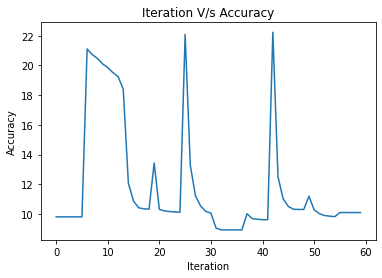

In [125]:
# Sorting the data in ascending order
inds = np.argsort(labels_train.T)[0]
images_train = images_train[inds]
labels_train = labels_train[inds]

images_train_try = images_train[0:60000].T
labels_train_try = labels_train[0:60000].T
# One hot encoding the labels
labels_train_encode_try = one_hot_encode(labels_train[0:60000]).T
epochs = 1
batch_size = 10
learning_rate = 0.01
step_size = 100

# Input data to be taken
weight_range,iteration_wt = train_network(images_train_try,labels_train_try,labels_train_encode_try,
                                                               batch_size,learning_rate,epochs,step_size)

# Testing to be done
images_test_try = images_test[:10000].T
labels_test_try = labels_test[:10000].T
# One hot encoding the labels
labels_test_encode_try = one_hot_encode(labels_test[0:10000]).T

one_epoch_accuracy_array = []
for i in range(len(weight_range)):
  prediction_value,ground_truth,test_accuracy,softmax=test_output(images_test_try,labels_test_try,labels_test_encode_try,
                                                                  weight_range[i])
  one_epoch_accuracy_array.append(test_accuracy)

print("Accuracy obtained is: ",one_epoch_accuracy_array)

x = [i for i in range(len(weight_range))]
y = one_epoch_accuracy_array 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('Iteration') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Iteration V/s Accuracy')     
# function to show the plot 
plt.show()

Accuracy obtained is as follows:  [10.32, 10.12, 24.89, 47.660000000000004, 57.809999999999995, 76.58, 80.23, 83.74000000000001, 86.50999999999999, 86.48, 86.36, 87.7, 87.48, 87.96000000000001, 88.49000000000001, 89.45, 88.0, 89.72, 88.94, 90.61, 90.2, 88.29, 89.74, 88.96, 86.53999999999999, 90.14, 91.18, 90.49000000000001, 89.29, 90.18, 90.86999999999999, 86.63, 90.92, 91.03, 91.12, 89.91, 91.44, 91.88, 91.56, 88.75, 91.08000000000001, 91.28, 92.2, 90.68, 91.56, 91.47, 91.42, 91.44, 92.28, 91.08000000000001, 92.04, 91.86999999999999, 91.53, 91.36999999999999, 90.86, 91.8, 91.42, 92.47, 91.77, 90.83]


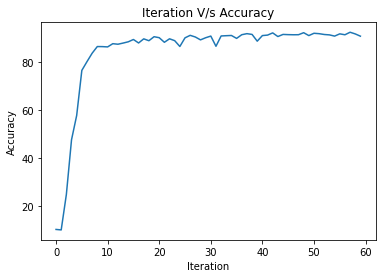

In [126]:
# Moving in forward direction of network
def forward_proceed_hidden_layer(input_neurons,weight1,weight2):
  z1_output = weight1.dot(input_neurons)
  a1_output = relu_func(z1_output)
  z2_output = weight2.dot(a1_output)
  softmax_output = softmax_func(z2_output)
  return z1_output,a1_output,z2_output,softmax_output

def back_propagate_hidden(deriv,input,z1,a1,z2,wt2):
  dwt2 = deriv.dot(a1.T)
  dz1 = wt2.T.dot(deriv) * relu_deriv(z1)
  dwt1 = dz1.dot(input.T)
  return dwt1, dwt2

def update_wt_hidden(wt1,wt2,dwt1,dwt2,learning_rate):
  wt1 = wt1 - learning_rate * dwt1 
  wt2 = wt2 - learning_rate * dwt2    
  return wt1, wt2

# Training network using Stochastic Gradient Descent
def train_network_hidden(images_train,labels_train,labels_train_encode,batch_size,learning_rate,epochs,step_size):
  # Initial random weight and bias
  weight1 = initialize(784,11)
  weight2 = initialize(11,10)
  
  iteration_weight = []

  # Number of iterations 
  for iteration in range(epochs):
    weight_of_ranges_1 =[]
    weight_of_ranges_2 = []
    # Calculating each batch size
    each_batch_size=len(images_train[1])//batch_size

    # Running loop for each batch size
    for each_batch in range(each_batch_size):
      # Batch start and end positions
      batch_start = each_batch*batch_size
      batch_end = (each_batch+1)*batch_size

      images_train_check = images_train[:,batch_start:batch_end]
      labels_train_check = labels_train[:,batch_start:batch_end]
      labels_train_encode_check = labels_train_encode[:,batch_start:batch_end]

      # Forward feeding the network
      z1,a1,z2,softmax1 = forward_proceed_hidden_layer(images_train_check,weight1,weight2)

      # Calculating deriative for backward propagation
      derivative1 = softmax1-labels_train_encode_check

      # Back propagation in the network
      dwt1,dwt2 = back_propagate_hidden(derivative1,images_train_check,z1,a1,z2,weight2)

      # Updating the weight in the network
      weight1,weight2 = update_wt_hidden(weight1,weight2,dwt1,dwt2,learning_rate)

      if each_batch % step_size == 0:
        weight_of_ranges_1.append(weight1)
        weight_of_ranges_2.append(weight2)
    iteration_weight.append(weight2)

  return weight_of_ranges_1,weight_of_ranges_2,iteration_weight

# Input data to be taken
#just to make all random sequences on all computers the same.
np.random.seed(1)

#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

images_train_try = images_train[0:60000].T
labels_train_try = labels_train[0:60000].T
# One hot encoding the labels
labels_train_encode_try = one_hot_encode(labels_train[0:60000]).T
learning_rate = 0.01
step_size = 100
batch_size = 10
epochs = 1
weight_range_hidden_1,weight_range_hidden_2,iteration_wt_hidden = train_network_hidden(images_train_try,labels_train_try,labels_train_encode_try,
                                                               batch_size,learning_rate,epochs,step_size)

# Testing to be done
images_test_try = images_test[:10000].T
labels_test_try = labels_test[:10000].T
# One hot encoding the labels
labels_test_encode_try = one_hot_encode(labels_test[0:10000]).T

def test_output_hidden(images_test_try,labels_test_try,labels_test_encode_try,weight1,weight2):
  act1,hidden,act2,soft=forward_proceed_hidden_layer(images_test_try,weight1,weight2)
  prediction_value = predicted_values(soft)
  ground_truth = labels_test_try
  test_accuracy=calc_accuracy(prediction_value,ground_truth)
  return prediction_value,ground_truth,test_accuracy

one_epoch_accuracy_array = []
for i in range(len(weight_range_hidden_1)):
  prediction_value,ground_truth,test_accuracy=test_output_hidden(images_test_try,labels_test_try,labels_test_encode_try,
                                                                  weight_range_hidden_1[i],weight_range_hidden_2[i])
  one_epoch_accuracy_array.append(test_accuracy)

print("Accuracy obtained is as follows: ",one_epoch_accuracy_array)
x = [i for i in range(len(weight_range_hidden_1))]
y = one_epoch_accuracy_array 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('Iteration') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Iteration V/s Accuracy')     
# function to show the plot 
plt.show()